In [66]:
import pickle
import numpy as np

In [67]:
with open('train_qa.txt', "rb") as fp:
    train_data = pickle.load(fp)

In [68]:
train_data

[(['Mary',
   'moved',
   'to',
   'the',
   'bathroom',
   '.',
   'Sandra',
   'journeyed',
   'to',
   'the',
   'bedroom',
   '.'],
  ['Is', 'Sandra', 'in', 'the', 'hallway', '?'],
  'no'),
 (['Mary',
   'moved',
   'to',
   'the',
   'bathroom',
   '.',
   'Sandra',
   'journeyed',
   'to',
   'the',
   'bedroom',
   '.',
   'Mary',
   'went',
   'back',
   'to',
   'the',
   'bedroom',
   '.',
   'Daniel',
   'went',
   'back',
   'to',
   'the',
   'hallway',
   '.'],
  ['Is', 'Daniel', 'in', 'the', 'bathroom', '?'],
  'no'),
 (['Mary',
   'moved',
   'to',
   'the',
   'bathroom',
   '.',
   'Sandra',
   'journeyed',
   'to',
   'the',
   'bedroom',
   '.',
   'Mary',
   'went',
   'back',
   'to',
   'the',
   'bedroom',
   '.',
   'Daniel',
   'went',
   'back',
   'to',
   'the',
   'hallway',
   '.',
   'Sandra',
   'went',
   'to',
   'the',
   'kitchen',
   '.',
   'Daniel',
   'went',
   'back',
   'to',
   'the',
   'bathroom',
   '.'],
  ['Is', 'Daniel', 'in', 'the', '

In [69]:
len(train_data)

10000

In [70]:
with open('test_qa.txt', "rb") as fp:
    test_data = pickle.load(fp)

In [71]:
test_data

[(['Mary',
   'got',
   'the',
   'milk',
   'there',
   '.',
   'John',
   'moved',
   'to',
   'the',
   'bedroom',
   '.'],
  ['Is', 'John', 'in', 'the', 'kitchen', '?'],
  'no'),
 (['Mary',
   'got',
   'the',
   'milk',
   'there',
   '.',
   'John',
   'moved',
   'to',
   'the',
   'bedroom',
   '.',
   'Mary',
   'discarded',
   'the',
   'milk',
   '.',
   'John',
   'went',
   'to',
   'the',
   'garden',
   '.'],
  ['Is', 'John', 'in', 'the', 'kitchen', '?'],
  'no'),
 (['Mary',
   'got',
   'the',
   'milk',
   'there',
   '.',
   'John',
   'moved',
   'to',
   'the',
   'bedroom',
   '.',
   'Mary',
   'discarded',
   'the',
   'milk',
   '.',
   'John',
   'went',
   'to',
   'the',
   'garden',
   '.',
   'Daniel',
   'moved',
   'to',
   'the',
   'bedroom',
   '.',
   'Daniel',
   'went',
   'to',
   'the',
   'garden',
   '.'],
  ['Is', 'John', 'in', 'the', 'garden', '?'],
  'yes'),
 (['Mary',
   'got',
   'the',
   'milk',
   'there',
   '.',
   'John',
   'moved',


In [72]:
len(test_data)

1000

In [73]:
train_data[0][0]

['Mary',
 'moved',
 'to',
 'the',
 'bathroom',
 '.',
 'Sandra',
 'journeyed',
 'to',
 'the',
 'bedroom',
 '.']

In [74]:
train_data[0][1]

['Is', 'Sandra', 'in', 'the', 'hallway', '?']

In [75]:
train_data[0][2]

'no'

In [76]:
vocab = set()

In [77]:
all_data = test_data + train_data

In [78]:
all_data

[(['Mary',
   'got',
   'the',
   'milk',
   'there',
   '.',
   'John',
   'moved',
   'to',
   'the',
   'bedroom',
   '.'],
  ['Is', 'John', 'in', 'the', 'kitchen', '?'],
  'no'),
 (['Mary',
   'got',
   'the',
   'milk',
   'there',
   '.',
   'John',
   'moved',
   'to',
   'the',
   'bedroom',
   '.',
   'Mary',
   'discarded',
   'the',
   'milk',
   '.',
   'John',
   'went',
   'to',
   'the',
   'garden',
   '.'],
  ['Is', 'John', 'in', 'the', 'kitchen', '?'],
  'no'),
 (['Mary',
   'got',
   'the',
   'milk',
   'there',
   '.',
   'John',
   'moved',
   'to',
   'the',
   'bedroom',
   '.',
   'Mary',
   'discarded',
   'the',
   'milk',
   '.',
   'John',
   'went',
   'to',
   'the',
   'garden',
   '.',
   'Daniel',
   'moved',
   'to',
   'the',
   'bedroom',
   '.',
   'Daniel',
   'went',
   'to',
   'the',
   'garden',
   '.'],
  ['Is', 'John', 'in', 'the', 'garden', '?'],
  'yes'),
 (['Mary',
   'got',
   'the',
   'milk',
   'there',
   '.',
   'John',
   'moved',


In [79]:
for story, question, answer in all_data:
    vocab = vocab.union(set(story))
    vocab = vocab.union(set(question))

In [80]:
vocab.add('yes')
vocab.add('no')

In [81]:
len(vocab)

37

In [82]:
max_story_len = max(len(data[0]) for data in all_data)
max_story_len

156

In [83]:
max_ques_len = max(len(data[1]) for data in all_data)
max_ques_len

6

In [84]:
from keras_preprocessing.sequence import pad_sequences
from keras_preprocessing.text import Tokenizer

In [85]:
tokenizer = Tokenizer(filters = [])

In [86]:
tokenizer.fit_on_texts(vocab)

In [87]:
tokenizer.word_index

{'sandra': 1,
 'to': 2,
 'there': 3,
 'down': 4,
 'is': 5,
 'office': 6,
 'travelled': 7,
 'bedroom': 8,
 'put': 9,
 'moved': 10,
 'dropped': 11,
 'journeyed': 12,
 'hallway': 13,
 'daniel': 14,
 '?': 15,
 'up': 16,
 'john': 17,
 'in': 18,
 'bathroom': 19,
 '.': 20,
 'got': 21,
 'yes': 22,
 'kitchen': 23,
 'milk': 24,
 'apple': 25,
 'went': 26,
 'football': 27,
 'picked': 28,
 'the': 29,
 'no': 30,
 'left': 31,
 'discarded': 32,
 'took': 33,
 'back': 34,
 'mary': 35,
 'garden': 36,
 'grabbed': 37}

In [88]:
train_story_text = []
train_question_text = []
train_answers = []

for story, question, answer in train_data:
    train_story_text.append(story)
    train_question_text.append(question)

In [89]:
train_story_seq = tokenizer.texts_to_sequences(train_story_text)

In [90]:
train_story_seq

[[35, 10, 2, 29, 19, 20, 1, 12, 2, 29, 8, 20],
 [35,
  10,
  2,
  29,
  19,
  20,
  1,
  12,
  2,
  29,
  8,
  20,
  35,
  26,
  34,
  2,
  29,
  8,
  20,
  14,
  26,
  34,
  2,
  29,
  13,
  20],
 [35,
  10,
  2,
  29,
  19,
  20,
  1,
  12,
  2,
  29,
  8,
  20,
  35,
  26,
  34,
  2,
  29,
  8,
  20,
  14,
  26,
  34,
  2,
  29,
  13,
  20,
  1,
  26,
  2,
  29,
  23,
  20,
  14,
  26,
  34,
  2,
  29,
  19,
  20],
 [35,
  10,
  2,
  29,
  19,
  20,
  1,
  12,
  2,
  29,
  8,
  20,
  35,
  26,
  34,
  2,
  29,
  8,
  20,
  14,
  26,
  34,
  2,
  29,
  13,
  20,
  1,
  26,
  2,
  29,
  23,
  20,
  14,
  26,
  34,
  2,
  29,
  19,
  20,
  14,
  28,
  16,
  29,
  27,
  3,
  20,
  14,
  26,
  2,
  29,
  8,
  20],
 [35,
  10,
  2,
  29,
  19,
  20,
  1,
  12,
  2,
  29,
  8,
  20,
  35,
  26,
  34,
  2,
  29,
  8,
  20,
  14,
  26,
  34,
  2,
  29,
  13,
  20,
  1,
  26,
  2,
  29,
  23,
  20,
  14,
  26,
  34,
  2,
  29,
  19,
  20,
  14,
  28,
  16,
  29,
  27,
  3,
  20,
  14,
  26,
 

In [91]:
def vectorize_stories(data, word_index=tokenizer.word_index,
                     max_story_len=max_story_len, max_ques_len=max_ques_len):
    X = []
    Xq = []
    Y = []
    
    for story, ques, ans in data:
        x = [word_index[word.lower()] for word in story]
        xq = [word_index[word.lower()] for word in ques]
        y = np.zeros(len(word_index) + 1)
        y[word_index[ans]] = 1
        
        X.append(x)
        Xq.append(xq)
        Y.append(y)
        
    return(pad_sequences(X, maxlen=max_story_len),
           pad_sequences(Xq, maxlen=max_ques_len),
           np.array(Y) )

In [92]:
inputs_train, queries_train, answers_train = vectorize_stories(train_data)

In [93]:
inputs_train

array([[ 0,  0,  0, ..., 29,  8, 20],
       [ 0,  0,  0, ..., 29, 13, 20],
       [ 0,  0,  0, ..., 29, 19, 20],
       ...,
       [ 0,  0,  0, ..., 29,  8, 20],
       [ 0,  0,  0, ..., 24,  3, 20],
       [ 0,  0,  0, ..., 25,  3, 20]])

In [94]:
queries_train

array([[ 5,  1, 18, 29, 13, 15],
       [ 5, 14, 18, 29, 19, 15],
       [ 5, 14, 18, 29,  6, 15],
       ...,
       [ 5,  1, 18, 29, 13, 15],
       [ 5, 35, 18, 29, 23, 15],
       [ 5, 35, 18, 29,  8, 15]])

In [95]:
answers_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [96]:
inputs_test, queries_test, answers_test = vectorize_stories(test_data)

In [97]:
inputs_test

array([[ 0,  0,  0, ..., 29,  8, 20],
       [ 0,  0,  0, ..., 29, 36, 20],
       [ 0,  0,  0, ..., 29, 36, 20],
       ...,
       [ 0,  0,  0, ..., 29, 25, 20],
       [ 0,  0,  0, ..., 29, 36, 20],
       [ 0,  0,  0, ..., 25,  3, 20]])

In [98]:
queries_test

array([[ 5, 17, 18, 29, 23, 15],
       [ 5, 17, 18, 29, 23, 15],
       [ 5, 17, 18, 29, 36, 15],
       ...,
       [ 5, 35, 18, 29,  8, 15],
       [ 5,  1, 18, 29, 36, 15],
       [ 5, 35, 18, 29, 36, 15]])

In [99]:
answers_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [100]:
vocab_len = len(vocab) + 1

In [101]:
import sys
print(sys.path)

['C:\\Users\\Aakanksha\\Desktop\\Manan\\Python IBM\\Chatbot', 'C:\\Users\\Aakanksha\\anaconda3\\python39.zip', 'C:\\Users\\Aakanksha\\anaconda3\\DLLs', 'C:\\Users\\Aakanksha\\anaconda3\\lib', 'C:\\Users\\Aakanksha\\anaconda3', '', 'C:\\Users\\Aakanksha\\anaconda3\\lib\\site-packages', 'C:\\Users\\Aakanksha\\anaconda3\\lib\\site-packages\\win32', 'C:\\Users\\Aakanksha\\anaconda3\\lib\\site-packages\\win32\\lib', 'C:\\Users\\Aakanksha\\anaconda3\\lib\\site-packages\\Pythonwin']


In [102]:
from tensorflow.python.keras.models import Sequential

In [103]:
from tensorflow.python.keras.models import Sequential, Model
from tensorflow.python.keras.layers.embeddings import Embedding
from tensorflow.python.keras.layers import Input, Activation, Dense, Permute, Dropout, add, dot, concatenate, LSTM

In [104]:
input_sequence = Input((max_story_len,))
question = Input((max_ques_len,))

In [105]:
# input encoder M
input_encoder_m = Sequential()
input_encoder_m.add(Embedding(input_dim=vocab_len, output_dim=64))
input_encoder_m.add(Dropout(0.3))

In [106]:
# input encoder C
input_encoder_c = Sequential()
input_encoder_c.add(Embedding(input_dim=vocab_len, output_dim=max_ques_len))
input_encoder_c.add(Dropout(0.3))

In [107]:
question_encoder = Sequential()
question_encoder.add(Embedding(input_dim=vocab_len, output_dim=64, input_length=max_ques_len))
question_encoder.add(Dropout(0.3))

In [108]:
input_encoded_m = input_encoder_m(input_sequence)
input_encoded_c = input_encoder_c(input_sequence)
question_encoded = question_encoder(question)

In [109]:
match = dot([input_encoded_m, question_encoded], axes = (2,2))
match = Activation('softmax')(match)

In [110]:
print('Match shape', match)

Match shape KerasTensor(type_spec=TensorSpec(shape=(None, 156, 6), dtype=tf.float32, name=None), name='activation_2/Softmax:0', description="created by layer 'activation_2'")


In [111]:
response = add([match, input_encoded_c])
response = Permute((2, 1))(response) 

In [112]:
answer = concatenate([response, question_encoded])

In [113]:
answer = LSTM(32)(answer)

In [114]:
answer = Dropout(0.5)(answer)
answer = Dense(vocab_len)(answer)

In [115]:
answer = Activation('softmax')(answer)

In [116]:
model = Model([input_sequence, question], answer)
model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [117]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 156)]        0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            [(None, 6)]          0                                            
__________________________________________________________________________________________________
sequential_3 (Sequential)       (None, None, 64)     2432        input_3[0][0]                    
__________________________________________________________________________________________________
sequential_5 (Sequential)       (None, 6, 64)        2432        input_4[0][0]                    
____________________________________________________________________________________________

In [118]:
history = model.fit([inputs_train, queries_train], answers_train,
                   batch_size = 30, epochs = 22,
                   validation_data = ([inputs_test, queries_test], answers_test))

Epoch 1/22
334/334 [==============================] - 9s 16ms/step - loss: 0.9321 - accuracy: 0.5022 - val_loss: 0.7017 - val_accuracy: 0.4970
Epoch 2/22
334/334 [==============================] - 5s 14ms/step - loss: 0.7076 - accuracy: 0.5014 - val_loss: 0.6941 - val_accuracy: 0.5030
Epoch 3/22
334/334 [==============================] - 5s 14ms/step - loss: 0.6974 - accuracy: 0.5041 - val_loss: 0.6937 - val_accuracy: 0.4970
Epoch 4/22
334/334 [==============================] - 5s 15ms/step - loss: 0.6961 - accuracy: 0.4902 - val_loss: 0.6933 - val_accuracy: 0.4970
Epoch 5/22
334/334 [==============================] - 5s 15ms/step - loss: 0.6946 - accuracy: 0.5039 - val_loss: 0.6940 - val_accuracy: 0.4970
Epoch 6/22
334/334 [==============================] - 5s 15ms/step - loss: 0.6953 - accuracy: 0.4994 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 7/22
334/334 [==============================] - 5s 14ms/step - loss: 0.6945 - accuracy: 0.4994 - val_loss: 0.6942 - val_accuracy: 0.4970

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


Text(0.5, 0, 'epochs')

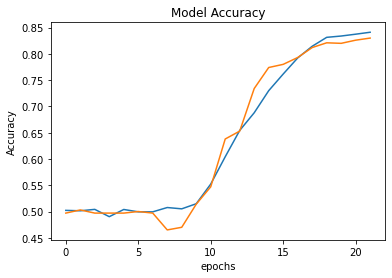

In [119]:
import matplotlib.pyplot as plt
print(history.history.keys())
plt.plot(history.history['accuracy'])

plt.plot(history.history['val_accuracy'])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("epochs")

In [120]:
#save
model.save("chatbot_model")

INFO:tensorflow:Assets written to: chatbot_model\assets


C:\Users\Aakanksha\anaconda3\lib\site-packages\tensorflow\python\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


In [121]:
#Evaluation on the test set
model.load_weights("chatbot_model")

In [122]:
pred_results = model.predict(([inputs_test, queries_test]))

In [123]:
pred_results

array([[6.4261076e-11, 5.6199490e-11, 5.3541917e-11, ..., 5.1434908e-11,
        5.8469438e-11, 9.1903089e-11],
       [4.8528729e-12, 3.5212493e-12, 4.0435745e-12, ..., 3.0390636e-12,
        3.2645215e-12, 6.3436491e-12],
       [5.8537925e-11, 8.3605609e-11, 5.6989823e-11, ..., 9.8973850e-11,
        6.2519497e-11, 1.3062955e-10],
       ...,
       [3.1255161e-12, 2.4251042e-12, 2.7196474e-12, ..., 2.0015552e-12,
        2.2352697e-12, 4.0336935e-12],
       [1.1692533e-11, 1.6662461e-11, 1.1266797e-11, ..., 1.9154579e-11,
        1.2570435e-11, 2.7315220e-11],
       [5.0990076e-12, 6.1420422e-12, 4.5439655e-12, ..., 6.8755080e-12,
        5.1779418e-12, 9.5508879e-12]], dtype=float32)

In [124]:
test_data[0][0]

['Mary',
 'got',
 'the',
 'milk',
 'there',
 '.',
 'John',
 'moved',
 'to',
 'the',
 'bedroom',
 '.']

In [125]:
story = ' '.join(word for word in test_data[100][0])

In [126]:
story

'John took the apple there . John went to the bathroom .'

In [127]:
query = ' '.join(word for word in test_data[100][1])

In [128]:
query

'Is John in the hallway ?'

In [129]:
test_data[100][2]

'no'

In [130]:
val_max = np.argmax(pred_results[37])

for key, val in tokenizer.word_index.items():
    if val == val_max:
        k = key
        
print("Predicted Answer is", k)
print("Probability of certainty", pred_results[37][val_max])

Predicted Answer is yes
Probability of certainty 0.94423413
